In [20]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.preprocessing import PolynomialFeatures

In [21]:
df=pd.read_csv('D://abhijith//internship1//DATASETS//Advertising.csv')
print(df.columns)
print(df.head())
# print(df.shape)
# print(df.describe())
# df.isnull().sum()

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')
   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9


In [22]:
x=df[['TV','Radio', 'Newspaper']]
y=df['Sales']

print(x.head(),"\n")
print(y.head())

      TV  Radio  Newspaper
0  230.1   37.8       69.2
1   44.5   39.3       45.1
2   17.2   45.9       69.3
3  151.5   41.3       58.5
4  180.8   10.8       58.4 

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64


In [23]:
'''splitting'''
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.3)
print(len(x_train))
print(len(x_test))
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# print(x_train)
# print(x_test)

''' Create polynomial features'''
poly = PolynomialFeatures(degree=2) 
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)
# print(x_train_poly)

140
60


In [24]:
model=LinearRegression()
# model=SVR(kernel="poly")

model.fit(x_train_poly,y_train)
y_pred=model.predict(x_test_poly)

In [25]:
mae=mean_absolute_error(y_test,y_pred)
print("MAE: ",mae)
mse=mean_squared_error(y_test,y_pred)
print("MSE: ",mse)
rs=r2_score(y_test,y_pred)
print("R_squared: ",rs)

MAE:  0.5493439390496224
MSE:  0.7749129676110127
R_squared:  0.9716396426823977


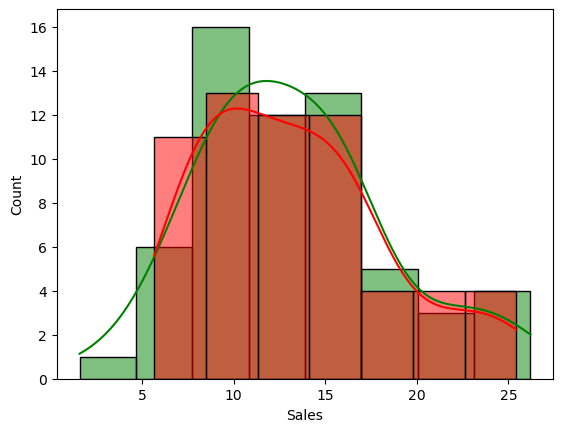

In [36]:
# sns.kdeplot(y_test, color='green', label='Actual Value') 
# sns.kdeplot(y_pred, color='red', label='Predicted Value')
sns.histplot(y_test, color='green', label='actual value', kde=True)
sns.histplot(y_pred,color='red',label='predicted value',kde=True)

plt.show()

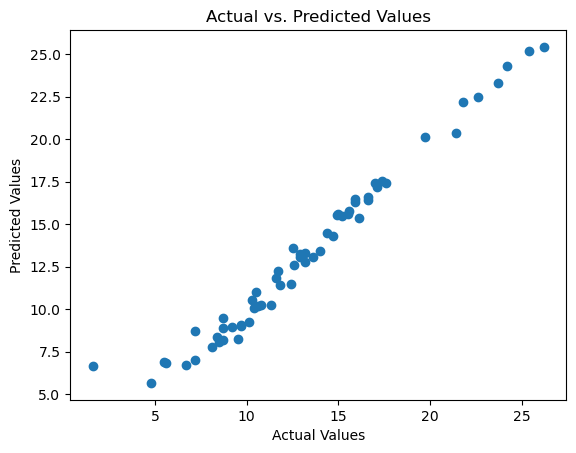

In [27]:


plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()


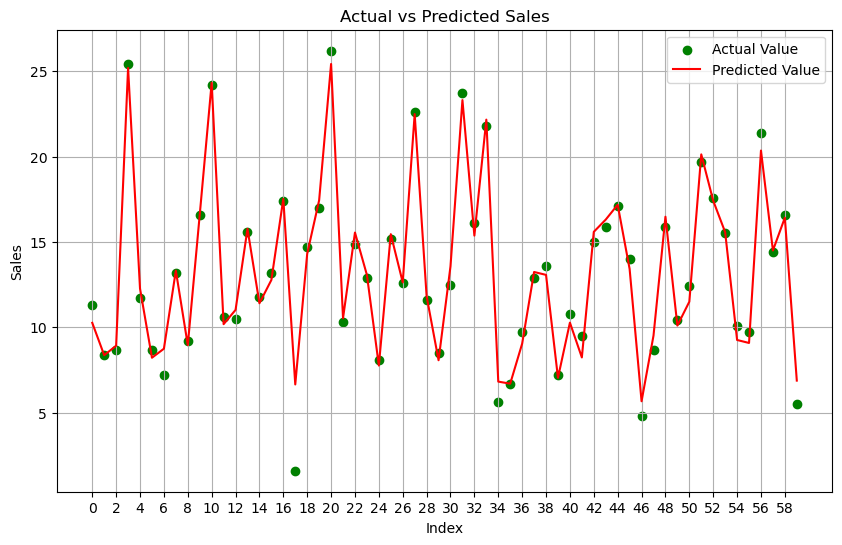

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Scatter plot for actual values
plt.scatter(range(len(y_test)), y_test, color='green', label='Actual Value')

# Line plot for predicted values
plt.plot(range(len(y_test)), y_pred, color='red', label='Predicted Value')
# plt.plot(range(len(y_test)), y_pred, color='red', label='Predicted Value')
# Adding labels and title
plt.xlabel('Index')
plt.ylabel('Sales')
plt.title('Actual vs Predicted Sales')
plt.legend()
plt.grid(True)
plt.xticks(np.arange(0, 60,2))

# Display the plot
plt.show()
